Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
# Download nltk stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Loading Dataset

In [ ]:
df = pd.read_csv('/content/IMDB_Dataset.csv', on_bad_lines='skip', quoting=3, escapechar='\\')


In [ ]:
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,review,sentiment
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,you may become comfortable with what is uncom...,positive
"""A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries",not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which,rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses,"particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""I thought this was a wonderful way to spend time on a too hot summer weekend",sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic,but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction,I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson,"in this she managed to tone down her """"sexy"""" image and jumped right into a average",but spirited young woman.<br /><br />This may not be the crown jewel of his career,"but it was wittier than """"Devil Wears Prada"""" and more interesting than """"Superman"""" a great comedy to go see with friends.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<b

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3668 entries, ('"One of the other reviewers has mentioned that after watching just 1 Oz episode you\'ll be hooked. They are right', ' as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence', ' which set in right from the word GO. Trust me', ' this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs', ' sex or violence. Its is hardcore', ' in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City', ' an experimental section of the prison where all the cells have glass fronts and face inwards', ' so privacy is not high on the agenda. Em City is home to many..Aryans', ' Muslims', ' gangstas', ' Latinos', ' Christians', ' Italians', ' Irish and more....so scuffles', ' death stares', " dodgy deali

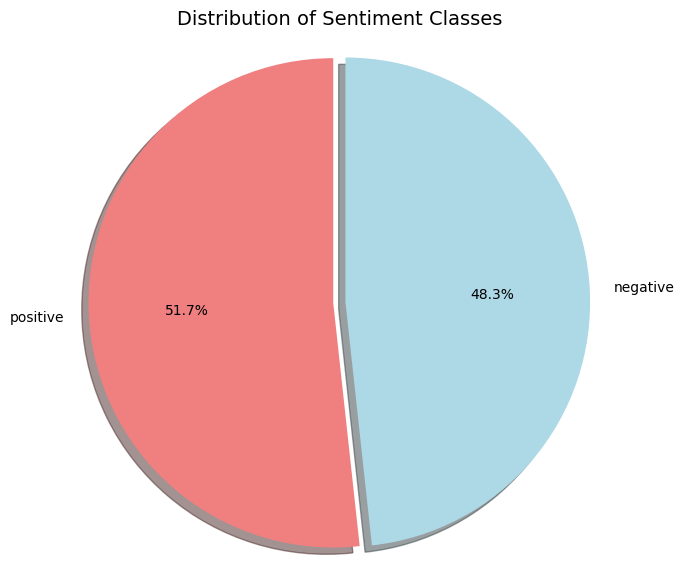

In [ ]:
df.drop_duplicates(inplace=True)
sentiment_counts = df['sentiment'].value_counts()
sentiment_labels = sentiment_counts.index
sentiment_sizes = sentiment_counts.values
plt.figure(figsize=(7, 7))
plt.pie(sentiment_sizes, labels=sentiment_labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'], explode=(0.05, 0), shadow=True)
plt.title('Distribution of Sentiment Classes', fontsize=14)
plt.axis('equal')
plt.show()

Processing

In [ ]:
import nltk
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Check if text is a string before applying string methods
    if isinstance(text, str):
        text = text.lower()
        text = re.sub('', '', text)
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        words = word_tokenize(text)
        words = [ps.stem(word) for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        # Handle non-string values (e.g., return an empty string or a placeholder)
        return ''  # or 'NaN' or any other suitable placeholder

df['cleaned_review'] = df['review'].apply(preprocess_text)

df[['review', 'cleaned_review']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,,,,,,,,,,,,,,,,,,,,,,,,,,review,cleaned_review
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,you may become comfortable with what is uncom...,may becom comfort uncomfort viewingthat get to...
"""A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries",not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which,rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses,"particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
"""""""The Cell"""" is an exotic masterpiece",a dizzying trip into not only the vast mind of a serial killer,but also into one of a very talented director. This is conclusive evidence of what can be achieved if human beings unleash their uninhibited imaginations. This is boldness at work,pushing aside thoughts to fall into formulas and cliches and creating something truly magnificent. This is the best movie of the year to date.<br /><br />I've read numerous complaints about this film,anywhere from all style and no substance to poorly cast characters and bad acting. To negatively criticize this film is to miss the point. This movie may be a landmark,"a tradition where future movies will hopefully follow. """"The Cell"""" has just opened the door to another world of imagination. So can we slam the door in its face and tell it and its director Tarsem Singh that we don't want any more? Personally",I would more than welcome another movie by Tarsem,and would love to see someone try to challenge him.<br /><br />We've all heard talk about going inside the mind of a serial killer,and yes,"I do agree that the """"genre"""" 

<ipython-input-13-3f014ae5a15d>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orig_counts, y=orig_words, palette='coolwarm')
<ipython-input-13-3f014ae5a15d>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=preproc_counts, y=preproc_words, palette='viridis')


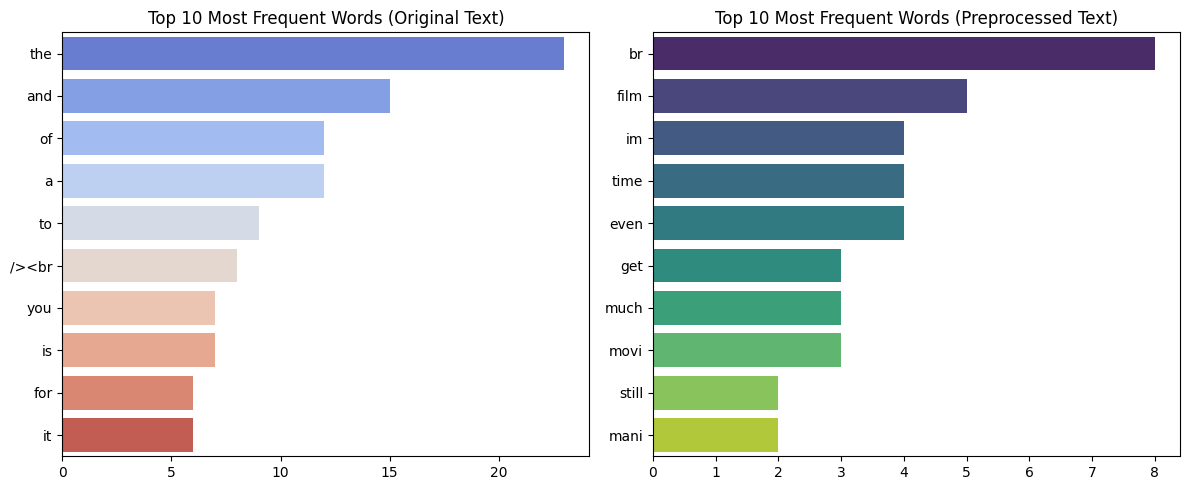

In [ ]:
from collections import Counter

def get_word_frequencies(text_column):
    words = []
    for review in text_column:
         if isinstance(review, str):
            words.extend(review.split())
    return Counter(words)

# Get word frequencies for original and cleaned reviews
original_word_freq = get_word_frequencies(df['review'])
preprocessed_word_freq = get_word_frequencies(df['cleaned_review'])

# Get top 10 frequent words
original_common_words = original_word_freq.most_common(10)
preprocessed_common_words = preprocessed_word_freq.most_common(10)

orig_words = [word for word, count in original_common_words]
orig_counts = [count for word, count in original_common_words]

preproc_words = [word for word, count in preprocessed_common_words]
preproc_counts = [count for word, count in preprocessed_common_words]

# Plot word frequencies
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=orig_counts, y=orig_words, palette='coolwarm')
plt.title('Top 10 Most Frequent Words (Original Text)')

plt.subplot(1, 2, 2)
sns.barplot(x=preproc_counts, y=preproc_words, palette='viridis')
plt.title('Top 10 Most Frequent Words (Preprocessed Text)')
plt.tight_layout()
plt.show()

TF-IDF Vectorization

In [ ]:

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()

# Convert sentiments to binary (1 for positive, 0 for negative)
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (25, 217)
Testing set shape: (7, 217)


Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.00      0.00      0.00         3

    accuracy                           0.43         7
   macro avg       0.25      0.38      0.30         7
weighted avg       0.29      0.43      0.34         7



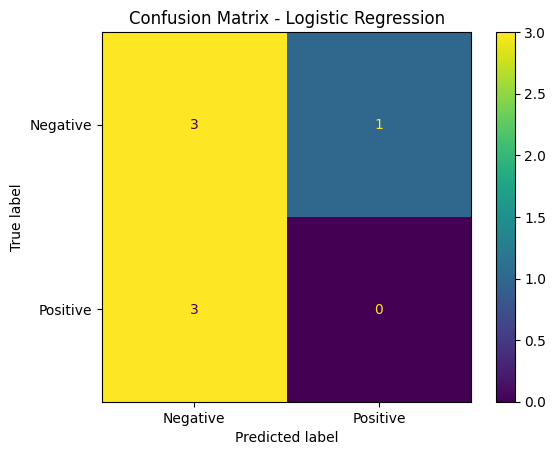

In [ ]:
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Display the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
ConfusionMatrixDisplay(cm_log_reg, display_labels=['Negative', 'Positive']).plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
import joblib

joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00


In [ ]:

import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
def preprocess_text_input(text):
    text = text.lower()
    text = re.sub('', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)


def predict_sentiment(review):
    processed_review = preprocess_text_input(review)
    review_tfidf = loaded_vectorizer.transform([processed_review])
    prediction = loaded_model.predict(review_tfidf)
    if prediction == 1:
        return "Positive review 😊", "positive"
    else:
        return "Negative review 😞", "negative"



In [ ]:
loaded_model = joblib.load('logistic_regression_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

input_box = widgets.Textarea(
    value='',
    placeholder='Type your movie review here...',
    description='Review:',
    layout=widgets.Layout(width='100%', height='100px'),
    style={'description_width': 'initial'}
)

submit_button = widgets.Button(
    description="Predict Sentiment",
    button_style='success',
    tooltip="Click to analyze sentiment"
)

output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        review = input_box.value

        sentiment_result, sentiment_class = predict_sentiment(review)

        if sentiment_class == "positive":
            display(widgets.HTML(f"{sentiment_result}"))
        else:
            display(widgets.HTML(f"{sentiment_result}"))

submit_button.on_click(on_button_clicked)

display(input_box, submit_button, output)

Textarea(value='', description='Review:', layout=Layout(height='100px', width='100%'), placeholder='Type your …

Button(button_style='success', description='Predict Sentiment', style=ButtonStyle(), tooltip='Click to analyze…

Output()